<a href="https://colab.research.google.com/github/LAKSHMIROHI/AI_ML_Avanthi_Rohitha/blob/main/MNIST_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Digit Classification Using MNIST Dataset**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import keras

In [ ]:
from keras.datasets import mnist

def load_data():
  (X_train, y_train), (X_test, y_test) = mnist.load_data()
  return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test  = load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

print(y_train[0:8])

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
[5 0 4 1 9 2 1 3]


In [ ]:
print(np.amax(X_train))
print(np.amin(X_train))


255
0


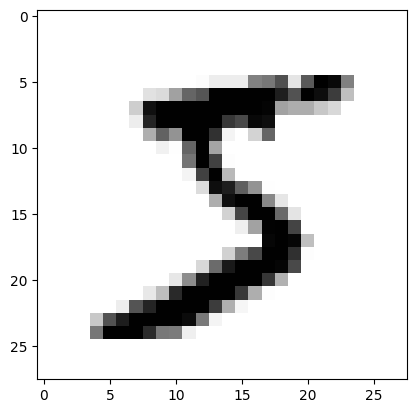

Label of image is 5


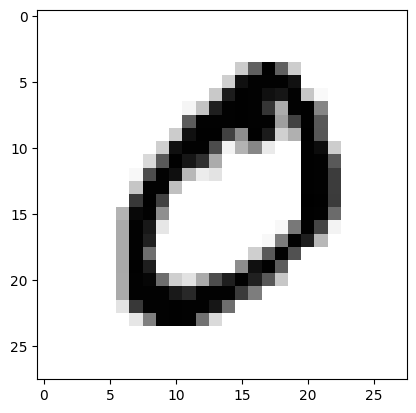

Label of image is 0


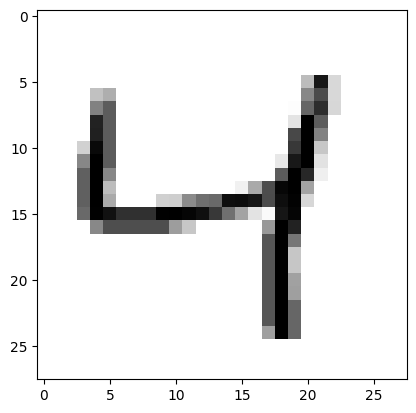

Label of image is 4


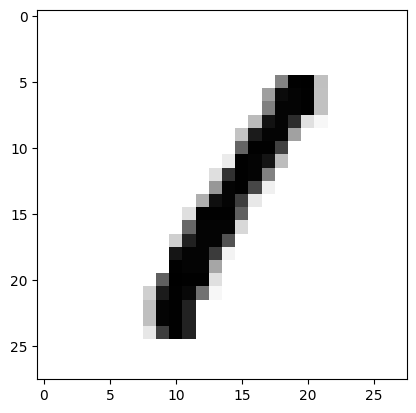

Label of image is 1


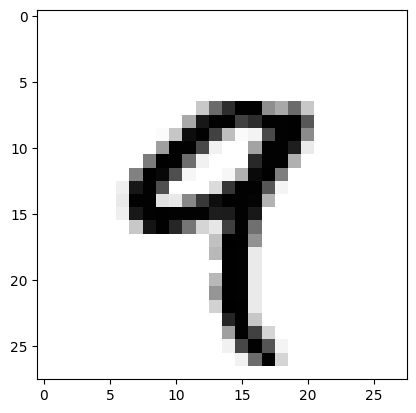

Label of image is 9


In [ ]:
for i in range(0,5):
  pixels=X_train[i]
  plt.imshow(pixels, cmap = plt.cm.binary)
  plt.show()
  print("Label of image is", y_train[i])


In [ ]:
def convert_dtype(x):

    x_float=x.astype('float32')
    return x_float

X_train = convert_dtype(X_train)
X_test = convert_dtype(X_test)

In [ ]:
def normalize(x):
  y = (x - np.min(x))/np.ptp(x)   #ptp function is used to find the range
  return y

X_train = normalize(X_train)
X_test = normalize(X_test)


In [ ]:
# to check if train_samples is normalized or not
np.isclose(np.amax(X_train), 1)


True

In [ ]:
# We need to reshape our train_data to be of shape (samples, height, width, channels) pass to Conv2D layer of keras

def reshape(x):

    x_r=x.reshape(x.shape[0],x.shape[1],x.shape[2],1)
    return x_r

X_train = reshape(X_train)
X_test = reshape(X_test)


In [ ]:
def oneHot(y, Ny):

    import tensorflow
    from keras.utils import to_categorical
    Ny=len(np.unique(y))
    y_oh=to_categorical(y,num_classes=Ny)
    return y_oh

# example
y_train = oneHot(y_train, 10)
y_test = oneHot(y_test, 10)


In [ ]:

from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from keras.models import Sequential
model = Sequential([
Conv2D(filters=32, kernel_size=(3, 3), padding='same', strides=(1,1), activation='relu', input_shape=(28, 28, 1)),
MaxPool2D(pool_size=(2, 2), strides=(2, 2)),
Dropout(0.2),
Conv2D(filters=64, kernel_size=(3, 3), padding='same', strides=(1,1), activation='relu'),
MaxPool2D(pool_size=(2, 2), strides=(2, 2)),
Dropout(0.2),
Flatten(),
Dense(units=128, activation='relu'),
Dense(units=10, activation='softmax'),
])

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from keras.optimizers import Adam
from keras.losses import CategoricalCrossentropy
from keras.metrics import CategoricalAccuracy

model.compile(optimizer=Adam(learning_rate=0.001),
            loss=CategoricalCrossentropy(),
            metrics=["acc"])


In [ ]:
results = model.fit(X_train, y_train, epochs=10, batch_size=256, validation_data=(X_test, y_test))


Epoch 1/10
235/235 [==============================] - 84s 350ms/step - loss: 0.3018 - acc: 0.9081 - val_loss: 0.0727 - val_acc: 0.9761
Epoch 2/10
235/235 [==============================] - 77s 330ms/step - loss: 0.0770 - acc: 0.9768 - val_loss: 0.0455 - val_acc: 0.9856
Epoch 3/10
235/235 [==============================] - 77s 328ms/step - loss: 0.0544 - acc: 0.9830 - val_loss: 0.0367 - val_acc: 0.9868
Epoch 4/10
235/235 [==============================] - 78s 332ms/step - loss: 0.0437 - acc: 0.9863 - val_loss: 0.0281 - val_acc: 0.9910
Epoch 5/10
235/235 [==============================] - 76s 324ms/step - loss: 0.0364 - acc: 0.9885 - val_loss: 0.0277 - val_acc: 0.9906
Epoch 6/10
235/235 [==============================] - 78s 332ms/step - loss: 0.0310 - acc: 0.9902 - val_loss: 0.0279 - val_acc: 0.9903
Epoch 7/10
235/235 [==============================] - 76s 325ms/step - loss: 0.0282 - acc: 0.9909 - val_loss: 0.0290 - val_acc: 0.9905
Epoch 8/10
235/235 [==============================] - 7

In [ ]:
import pickle

pickle.dump(model, open('model.pth', 'wb'))


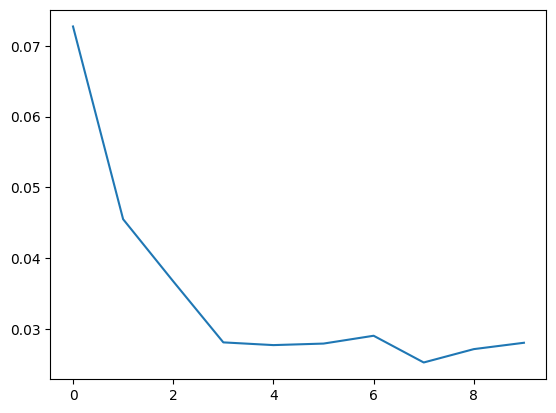

In [ ]:
results.history.keys()
import matplotlib.pyplot as plt
plt.plot(range(len(results.history['val_loss'])), results.history['val_loss'])
plt.show()


In [ ]:
def predict(x):
    y = model.predict(x)
    return y

predicted_labels_train = predict(X_train)


1875/1875 [==============================] - 24s 13ms/step


In [ ]:
def oneHot_tolabel(y):
    y_b=[]
    from sklearn.preprocessing import LabelEncoder
    labelencoder = LabelEncoder()
    y_b[:, 0] = labelencoder.fit_transform(y_b[:, 0])
    return y_b


In [ ]:
def create_confusion_matrix(true_labels, predicted_labels):

    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(true_labels.argmax(axis=1), predicted_labels.argmax(axis=1))
    return cm

cm = create_confusion_matrix((y_train), (predict(X_train)))
print(cm)


1875/1875 [==============================] - 26s 14ms/step
[[5922    0    0    0    0    0    1    0    0    0]
 [   0 6739    2    0    0    0    1    0    0    0]
 [   0    1 5956    0    0    0    0    1    0    0]
 [   3    0   15 6067    0   34    0    7    1    4]
 [   0    1    0    0 5829    0    1    1    0   10]
 [   4    1    0    1    0 5410    4    0    1    0]
 [   4    1    0    1    0    4 5908    0    0    0]
 [   0   10    4    0    1    1    0 6247    0    2]
 [   8    5    9    1    2    5    1    2 5800   18]
 [   4    3    0    0    6    1    0   15    1 5919]]


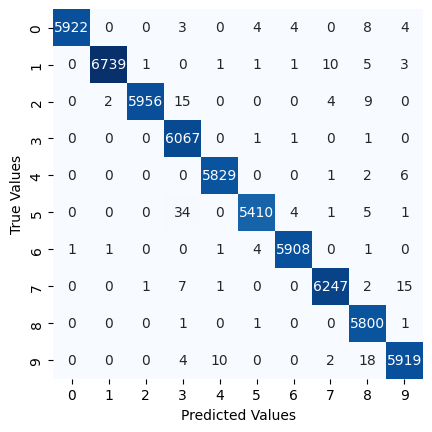

In [ ]:
# Plot Confusion matrix
sns.heatmap(cm.T, square=True, annot=True, cbar=False, cmap=plt.cm.Blues, fmt='.0f')
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();


In [ ]:
!pip install Streamlit -q


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 38.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.6 MB/s eta 0:00:00


In [ ]:
!pip install streamlit-drawable-canvas --quiet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 9.5 MB/s eta 0:00:00


In [ ]:
import requests

def get_public_ip():
    response = requests.get('https://api.ipify.org')
    return response.text

public_ip = get_public_ip()
print(f"Public IP Address: {public_ip}")


Public IP Address: 35.233.230.209


In [ ]:
!streamlit run streamlit_app.py & npx localtunnel --port 8501


**STREAMLIT**